# Data Acquisition:
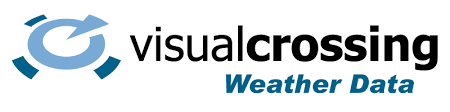

### ! Columns !
name: The name of the location or city (in this case, Barcelona).  
datetime: The date and time the weather information was recorded.  
tempmax: The maximum temperature recorded in the specified time interval.  
tempmin: The minimum temperature recorded in the specified time interval.  
temp: The average temperature recorded over the specified time interval.  
feelslikemax: The maximum felt temperature recorded in the specified time interval.  
feelslikemin: The lowest felt temperature recorded in the specified time interval.  
feelslike: The average felt temperature recorded over the specified time interval.  
dew: The dew point, which is the temperature at which moist air becomes saturated and begins to condense.  
humidity: The relative humidity of the air.  
precip: The amount of precipitation (rain) recorded in the specified time interval.  
preciprob: The probability of precipitation in the specified time interval.  
precipcover: The precipitation coverage in the specified time interval.  
preciptype: The type of precipitation (for example, rain, snow, hail) recorded in the specified time interval.  
snow: The amount of snow recorded in the specified time interval.  
snowdepth: The snow depth recorded in the specified time interval.  
windgust: The maximum wind gust recorded in the specified time interval.  
windspeed: The average wind speed recorded over the specified time interval.  
winddir: The wind direction recorded in the specified time interval.  
sealevelpressure: The atmospheric pressure at sea level recorded over the specified time interval.  
cloudcover: The cloud cover in the specified time interval.  
visibility: The visibility recorded in the specified time interval.  
solarradiation: The solar radiation recorded in the specified time interval.  
solarenergy: The solar energy recorded in the specified time interval.  
uvindex: The UV index recorded over the specified time interval.  
severerisk: The severe weather risk in the specified time range.  
sunrise: The time of sunrise in the specified time range.  
sunset: The time the sun sets in the specified time range.  
moonphase: The phase of the moon in the specified time range.  
conditions: The general weather conditions in the specified time range.  
description: A more detailed description of the weather conditions in the specified time range.  
icon: An icon representative of the weather conditions in the specified time range.  
stations: The weather stations involved in data collection.  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

C:\Users\maldi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
#barcelonaweather.csv
#weatherbarcelona2015-2024.csv

In [2]:
#df1 = pd.read_csv('barcelonaweather.csv')
#df1

## ! Our weather dataframe from 2017 to 2024 !

In [80]:
df2 = pd.read_csv('weatherbarcelona2017-2024.csv')
df2

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,barcelona,2019-02-22,20.5,6.0,13.0,20.5,3.3,12.6,5.7,63.4,...,13.8,6,NaN,2019-02-22T07:37:04,2019-02-22T18:33:13,0.59,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840..."
1,barcelona,2019-02-23,18.9,8.2,13.1,18.9,6.6,12.8,6.1,64.0,...,13.4,6,NaN,2019-02-23T07:35:36,2019-02-23T18:34:26,0.63,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840..."
2,barcelona,2019-02-24,15.2,7.2,11.4,15.2,5.6,10.9,6.2,71.5,...,13.8,6,NaN,2019-02-24T07:34:07,2019-02-24T18:35:38,0.66,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840..."
3,barcelona,2019-02-25,16.1,5.7,10.7,16.1,3.1,10.2,6.4,74.8,...,13.2,6,NaN,2019-02-25T07:32:37,2019-02-25T18:36:49,0.69,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,AR110,..."
4,barcelona,2019-02-26,18.0,7.3,12.3,18.0,5.2,11.7,5.9,66.6,...,14.7,6,NaN,2019-02-26T07:31:06,2019-02-26T18:38:01,0.75,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,AR110,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,barcelona,2024-02-18,17.6,7.7,12.7,17.6,5.8,12.4,6.7,68.1,...,11.4,5,10.0,2024-02-18T07:43:06,2024-02-18T18:28:08,0.29,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109..."
2606,barcelona,2024-02-19,18.0,9.7,13.2,18.0,9.7,13.2,6.7,65.6,...,9.0,5,10.0,2024-02-19T07:41:42,2024-02-19T18:29:21,0.33,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109..."
2607,barcelona,2024-02-20,17.4,8.7,12.3,17.4,7.0,11.8,6.5,68.7,...,11.5,6,10.0,2024-02-20T07:40:18,2024-02-20T18:30:35,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,08181099999,0..."
2608,barcelona,2024-02-21,18.1,7.4,12.1,18.1,5.6,12.0,8.0,76.5,...,11.0,6,10.0,2024-02-21T07:38:52,2024-02-21T18:31:48,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,LEGE,LELL,V7DJ5"


In [4]:
df2.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [4]:
# Define the relevant features for prediction, excluding 'severerisk', 'conditions', 'description'
weather_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike',
                    'dew', 'humidity', 'precip', 'precipcover', 'snow', 'snowdepth', 'windgust',
                    'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
                    'solarradiation', 'solarenergy', 'uvindex']

In [5]:
# Filter the dataset to include only the selected features
weather_data = df2[weather_features]

In [6]:
# Check for missing values and handle them as necessary
weather_data['windgust'].fillna(weather_data['windgust'].median(), inplace=True)

C:\Users\maldi\AppData\Local\Temp\ipykernel_19076\2695829295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['windgust'].fillna(weather_data['windgust'].median(), inplace=True)


In [7]:
# Define features (X) and target (y)
X = weather_data.drop(columns=['temp'])  # Dropping the target variable
y = weather_data['temp']

In [8]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")

MAE: 0.08626436781609308, MSE: 0.021201118773946256, R^2: 0.9994296166329194


In [43]:
# Save the model to a file
model_path = 'weather_predictor_model.joblib'
joblib.dump(model, model_path)

['weather_predictor_model.joblib']

In [ ]:
# Load the model from the file for prediction use
model = joblib.load(model_path)

# Dash app for prediction display
app = Dash(__name__)

def get_weather_features_for_barcelona(date):
    # Example values matching the training data structure and order
    features = [
        20,  # tempmax
        10,  # tempmin
        19,  # feelslikemax
        11,  # feelslikemin
        5,   # dew
        70,  # humidity (example value)
        0.5, # precip
        0.2, # precipcover
        0,   # snow
        0,   # snowdepth
        25,  # windgust
        10,  # windspeed
        150, # winddir
        1015,# sealevelpressure
        50,  # cloudcover (example value)
        10,  # visibility
        200, # solarradiation
        5,   # solarenergy
        5,    # uvindex
        1000 #missingvalue
    ]
    return features, 70, 50  # Return features along with humidity and cloudcover for display

app.layout = html.Div([
    html.H1('Weather Prediction for Barcelona Today'),
    html.Div(id='prediction-output'),
    html.Button('Refresh', id='refresh-button', n_clicks=0)
])

@app.callback(
    Output('prediction-output', 'children'),
    Input('refresh-button', 'n_clicks')
)
def update_output(n_clicks):
    today = datetime.date.today()
    features_today, humidity, cloudcover = get_weather_features_for_barcelona(today)
    
    # Predict temperature for today using the model
    predicted_temp = model.predict([features_today])[0]
    
    return [
        html.P(f'Predicted temperature for {today.strftime("%Y-%m-%d")} in Barcelona is: {predicted_temp:.2f}°C'),
        html.P(f'Humidity: {humidity}%'),
        html.P(f'Cloud Cover: {cloudcover}%')
    ]

if __name__ == '__main__':
    app.run_server(debug=True)

/Users/joaquintejo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/joaquintejo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/joaquintejo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/joaquintejo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

Exception in thread Thread-124 (<lambda>):
Traceback (most recent call last):
  File "/Users/joaquintejo/anaconda3/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/Users/joaquintejo/anaconda3/lib/python3.10/threading

In [101]:
df2.isnull().sum()

tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
humidity              0
precip                0
precipprob            0
precipcover           0
windgust            101
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarenergy           0
dtype: int64

In [102]:
df2 = df2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
           'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover',
           'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 
           'visibility', 'solarenergy']]

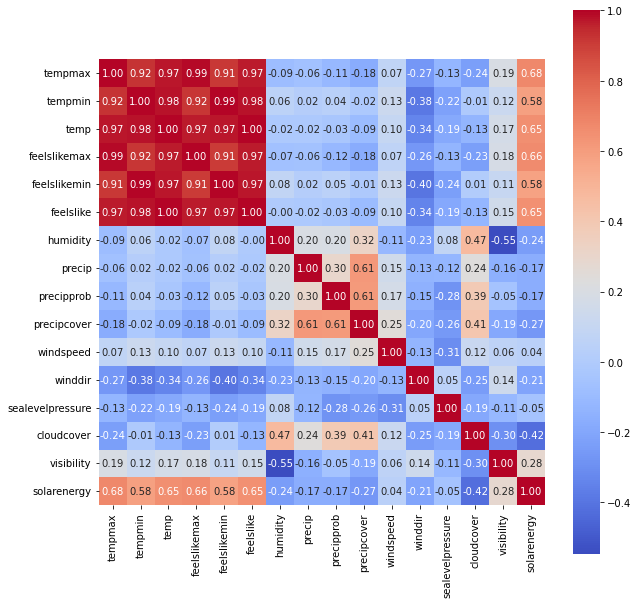

In [103]:
numeric_columns = df2.select_dtypes(include='number')
corr = numeric_columns.corr()

#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

In [131]:
corr

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy
tempmax,1.000000,0.923132,0.972131,0.991635,0.911641,0.967715,-0.087465,-0.063119,-0.112703,-0.177128,0.071623,-0.266454,-0.127099,-0.235490,0.193863,0.676614
tempmin,0.923132,1.000000,0.979477,0.921153,0.994947,0.978398,0.056529,0.016303,0.038093,-0.020209,0.126512,-0.384615,-0.224822,-0.014134,0.118795,0.583906
temp,0.972131,0.979477,1.000000,0.967810,0.972031,0.997776,-0.020680,-0.020443,-0.034110,-0.094989,0.099577,-0.339174,-0.185093,-0.132971,0.167725,0.650362
feelslikemax,0.991635,0.921153,0.967810,1.000000,0.905770,0.967131,-0.067296,-0.059417,-0.116459,-0.176356,0.066085,-0.263995,-0.131278,-0.233996,0.183851,0.663182
feelslikemin,0.911641,0.994947,0.972031,0.905770,1.000000,0.973766,0.077049,0.018299,0.049613,-0.010433,0.130223,-0.395821,-0.237106,0.005864,0.105010,0.579262
feelslike,0.967715,0.978398,0.997776,0.967131,0.973766,1.000000,-0.003556,-0.020572,-0.034459,-0.093569,0.096020,-0.341860,-0.190080,-0.127620,0.153779,0.645393
humidity,-0.087465,0.056529,-0.020680,-0.067296,0.077049,-0.003556,1.000000,0.197989,0.195426,0.318677,-0.114310,-0.234707,0.078917,0.471377,-0.546218,-0.238524
precip,-0.063119,0.016303,-0.020443,-0.059417,0.018299,-0.020572,0.197989,1.000000,0.299084,0.614783,0.150989,-0.130213,-0.124113,0.237214,-0.157782,-0.166813
precipprob,-0.112703,0.038093,-0.034110,-0.116459,0.049613,-0.034459,0.195426,0.299084,1.000000,0.612970,0.168588,-0.153007,-0.282110,0.388384,-0.053366,-0.170590
precipcover,-0.177128,-0.020209,-0.094989,-0.176356,-0.010433,-0.093569,0.318677,0.614783,0.612970,1.000000,0.249794,-0.197598,-0.259636,0.408824,-0.191951,-0.267733


In [104]:
# LINEAR REGRESSION

In [105]:
X_for_temp = df2[['tempmax', 'tempmin', 'solarenergy', 'sealevelpressure', 'visibility']]
y_temp = df2['temp']

X_train, X_test, y_temp_train, y_temp_test = train_test_split(X_for_temp, y_temp, test_size=0.2, random_state=42)

In [106]:
model_temp = LinearRegression()
model_temp.fit(X_train, y_temp_train)

LinearRegression()

In [107]:
# Temperature predictions
y_temp_pred = model_temp.predict(X_test)

In [108]:
rmse_temp = mean_squared_error(y_temp_test, y_temp_pred, squared=False)
r2_temp = model_temp.score(X_test, y_temp_test)

print("RMSE for Temperature:", rmse_temp)
print("R² for Temperature:", r2_temp)

#99%

RMSE for Temperature: 0.5766695478677063
R² for Temperature: 0.991053315755229


In [109]:
# RANDOM FOREST

In [171]:
#X_for_humidity = df2[['precipcover', 'winddir', 'temp', 'visibility', 'cloudcover', 'solarenergy']] 
X_for_humidity = df2.drop(columns=['humidity'])  # Dropping the target variable
y_humidity = df2['humidity']

X_train, X_test, y_humidity_train, y_humidity_test = train_test_split(X_for_humidity, y_humidity, test_size=0.2, random_state=42)

In [172]:
model_humidity = RandomForestRegressor(random_state=42)
model_humidity.fit(X_train, y_humidity_train)

RandomForestRegressor(random_state=42)

In [173]:
# Humidity predictions
y_humidity_pred = model_humidity.predict(X_test)

In [174]:
rmse_humidity = mean_squared_error(y_humidity_test, y_humidity_pred, squared=False)
r2_humidity = model_humidity.score(X_test, y_humidity_test)

print("RMSE for Humidity:", rmse_humidity)
print("R² for Humidity:", r2_humidity)

RMSE for Humidity: 6.578665124324818
R² for Humidity: 0.5517502893962756


In [175]:
X_for_cloudcover = df2.drop(columns=['cloudcover'])  # Dropping the target variable
y_cloudcover = df2['cloudcover']

X_train, X_test, y_cloudcover_train, y_cloudcover_test = train_test_split(X_for_cloudcover, y_cloudcover, test_size=0.2, random_state=42)

In [179]:
model_cloudcover = RandomForestRegressor(random_state=42)
model_cloudcover.fit(X_train, y_cloudcover_train)

RandomForestRegressor(random_state=42)

In [180]:
# Cloud cover predictions
y_cloudcover_pred = model_cloudcover.predict(X_test)

In [181]:
rmse_cloudcover = mean_squared_error(y_cloudcover_test, y_cloudcover_pred, squared=False)
r2_cloudcover = model_cloudcover.score(X_test, y_cloudcover_test)

print("RMSE for Cloudcover:", rmse_cloudcover)
print("R² for Cloudcover:", r2_cloudcover)

RMSE for Cloudcover: 11.934030503137171
R² for Cloudcover: 0.5505835375466681
